############################

### '''Importing Libraries'''
###########################

In [28]:
#!pip install nltk
#!pip install selenium

In [29]:
import pandas as pd
import numpy as np
from selenium import webdriver
import bs4 as bs
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps=PorterStemmer()

##########################
### '''Loading Data'''
##########################

In [30]:
data=pd.read_excel('/home/kumarg/Downloads/Sentiment-Ananlysis_Government-portal-master/cik_list.xlsx')
data.head()

,CIK,CONAME,FYRMO,FDATE,FORM,SECFNAME,SECFNAME_URL
0,3662,SUNBEAM CORP/FL/,199803,35860,10-K405,edgar/data/3662/0000950170-98-000413.txt,https://www.sec.gov/Archives/edgar/data/3662/0...
1,3662,SUNBEAM CORP/FL/,199805,35930,10-Q,edgar/data/3662/0000950170-98-001001.txt,https://www.sec.gov/Archives/edgar/data/3662/0...
2,3662,SUNBEAM CORP/FL/,199808,36020,NT 10-Q,edgar/data/3662/0000950172-98-000783.txt,https://www.sec.gov/Archives/edgar/data/3662/0...
3,3662,SUNBEAM CORP/FL/,199811,36111,10-K/A,edgar/data/3662/0000950170-98-002145.txt,https://www.sec.gov/Archives/edgar/data/3662/0...
4,3662,SUNBEAM CORP/FL/,199811,36115,NT 10-Q,edgar/data/3662/0000950172-98-001203.txt,https://www.sec.gov/Archives/edgar/data/3662/0...


###################################
### '''Reading URL from column'''
##################################

In [31]:
from urllib.request import urlopen
my_files=[]
for link in data.SECFNAME_URL[0:1]:  
    with urlopen(link) as response:
        myfile = response.read()
        print(myfile)
        my_files.append(myfile)

b'-----BEGIN PRIVACY-ENHANCED MESSAGE-----\nProc-Type: 2001,MIC-CLEAR\nOriginator-Name: webmaster@www.sec.gov\nOriginator-Key-Asymmetric:\n MFgwCgYEVQgBAQICAf8DSgAwRwJAW2sNKK9AVtBzYZmr6aGjlWyK3XmZv3dTINen\n TWSM7vrzLADbmYQaionwg5sDW3P6oaM5D3tdezXMm7z1T+B+twIDAQAB\nMIC-Info: RSA-MD5,RSA,\n EvPdKfnjzBIjWkEk2RgNCk1/52qXomHpN+LDwL/XTT/XBuAzk70AYYrsxlQbyiqr\n V5559QRyTgPe9PfVt0db9Q==\n\n<SEC-DOCUMENT>0000950170-98-000413.txt : 19980309\n<SEC-HEADER>0000950170-98-000413.hdr.sgml : 19980309\nACCESSION NUMBER:\t\t0000950170-98-000413\nCONFORMED SUBMISSION TYPE:\t10-K405\nPUBLIC DOCUMENT COUNT:\t\t21\nCONFORMED PERIOD OF REPORT:\t19971228\nFILED AS OF DATE:\t\t19980306\nSROS:\t\t\tNYSE\n\nFILER:\n\n\tCOMPANY DATA:\t\n\t\tCOMPANY CONFORMED NAME:\t\t\tSUNBEAM CORP/FL/\n\t\tCENTRAL INDEX KEY:\t\t\t0000003662\n\t\tSTANDARD INDUSTRIAL CLASSIFICATION:\tELECTRIC HOUSEWARES & FANS [3634]\n\t\tIRS NUMBER:\t\t\t\t251638266\n\t\tSTATE OF INCORPORATION:\t\t\tDE\n\t\tFISCAL YEAR END:\t\t\t1229\n\n\tFILING V

In [32]:
#################################
'''Converting data to string'''
#################################
my_files=[x.decode('utf-8') for x in my_files]


In [33]:
#################################
'''Converted data to string'''
#################################
type(my_files)

list

In [34]:
#################################
'''Verifying data'''
#################################

my_files=my_files[0]

In [35]:
#################################
'''Importing Word Lemmatizer'''
#################################
from nltk.stem import WordNetLemmatizer
import re
wnl=WordNetLemmatizer()


In [36]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/kumarg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
#################################
'''Tokenize data'''
#################################
sentence=nltk.sent_tokenize(my_files)

####################################
### '''Cleaning data using Stopwords'''
####################################

In [38]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/kumarg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/kumarg/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [39]:
corpus=[]
for i in range(len(sentence)):
    review= re.sub("[^a-zA-Z]"," ", sentence[i])
    review=review.lower()  
    review=review.split()
    review=[wnl.lemmatize(word) for word in review if not word in set(stopwords.words("english"))]
    review=" ".join(review)
    corpus.append(review)

############################
### '''counting of words'''
###########################

In [40]:
   
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

print( word_count(corpus[0]))

{'begin': 1, 'privacy': 1, 'enhanced': 1, 'message': 1, 'proc': 1, 'type': 4, 'mic': 2, 'clear': 1, 'originator': 2, 'name': 4, 'webmaster': 1, 'www': 1, 'sec': 6, 'gov': 1, 'key': 2, 'asymmetric': 1, 'mfgwcgyevqgbaqicaf': 1, 'dsgawrwjaw': 1, 'snkk': 1, 'avtbzyzmr': 1, 'agjlwyk': 1, 'xmzv': 1, 'dtinen': 1, 'twsm': 1, 'vrzladbmyqaionwg': 1, 'sdw': 1, 'p': 1, 'oam': 1, 'tdezxmm': 1, 'z': 1, 'b': 1, 'twidaqab': 1, 'info': 1, 'rsa': 2, 'md': 1, 'evpdkfnjzbijwkek': 1, 'rgnck': 1, 'qxomhpn': 1, 'ldwl': 1, 'xtt': 1, 'xbuazk': 1, 'ayyrsxlqbyiqr': 1, 'v': 1, 'qrytgpe': 1, 'pfvt': 1, 'db': 1, 'q': 1, 'document': 3, 'txt': 1, 'header': 2, 'hdr': 1, 'sgml': 1, 'accession': 1, 'number': 4, 'conformed': 4, 'submission': 1, 'k': 4, 'public': 1, 'count': 1, 'period': 2, 'report': 3, 'filed': 1, 'date': 2, 'sros': 1, 'nyse': 1, 'filer': 1, 'company': 4, 'data': 1, 'sunbeam': 2, 'corp': 1, 'fl': 3, 'central': 1, 'index': 1, 'standard': 1, 'industrial': 1, 'classification': 1, 'electric': 1, 'housewares'

#################################
### '''Total word count'''
#################################

In [41]:
for new_corpus in corpus:
    new_corpus=word_count(new_corpus)
    print(new_corpus)

{'begin': 1, 'privacy': 1, 'enhanced': 1, 'message': 1, 'proc': 1, 'type': 4, 'mic': 2, 'clear': 1, 'originator': 2, 'name': 4, 'webmaster': 1, 'www': 1, 'sec': 6, 'gov': 1, 'key': 2, 'asymmetric': 1, 'mfgwcgyevqgbaqicaf': 1, 'dsgawrwjaw': 1, 'snkk': 1, 'avtbzyzmr': 1, 'agjlwyk': 1, 'xmzv': 1, 'dtinen': 1, 'twsm': 1, 'vrzladbmyqaionwg': 1, 'sdw': 1, 'p': 1, 'oam': 1, 'tdezxmm': 1, 'z': 1, 'b': 1, 'twidaqab': 1, 'info': 1, 'rsa': 2, 'md': 1, 'evpdkfnjzbijwkek': 1, 'rgnck': 1, 'qxomhpn': 1, 'ldwl': 1, 'xtt': 1, 'xbuazk': 1, 'ayyrsxlqbyiqr': 1, 'v': 1, 'qrytgpe': 1, 'pfvt': 1, 'db': 1, 'q': 1, 'document': 3, 'txt': 1, 'header': 2, 'hdr': 1, 'sgml': 1, 'accession': 1, 'number': 4, 'conformed': 4, 'submission': 1, 'k': 4, 'public': 1, 'count': 1, 'period': 2, 'report': 3, 'filed': 1, 'date': 2, 'sros': 1, 'nyse': 1, 'filer': 1, 'company': 4, 'data': 1, 'sunbeam': 2, 'corp': 1, 'fl': 3, 'central': 1, 'index': 1, 'standard': 1, 'industrial': 1, 'classification': 1, 'electric': 1, 'housewares'

In [42]:
corpus=''.join(map(str,corpus))
type(corpus)

str

In [43]:
#!pip install textblob
from textblob import TextBlob
obj=TextBlob(corpus)
sentiment=obj.sentiment.polarity

In [44]:
if sentiment==0:
    print("The article is Neutral :",sentiment)
elif sentiment>0:
    print("The article is Positive :",sentiment)
else :
    Print("The article is Negative :",sentiment)

The article is Positive : 0.08126571903532084


In [45]:
corpus0=word_count(corpus)
words_occurrence=pd.DataFrame(corpus0.items(),columns=['Words','No. of occurrence'])
words_occurrence.head()

,Words,No. of occurrence
0,begin,8
1,privacy,2
2,enhanced,2
3,message,2
4,proc,1


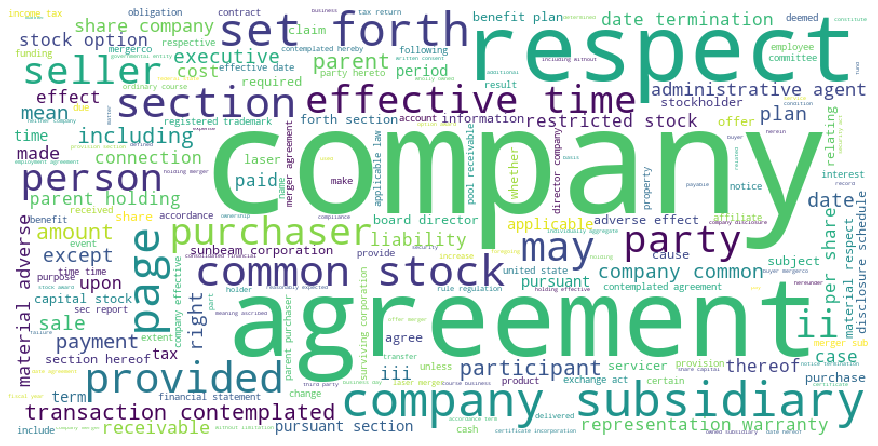

In [47]:
#corpus=str(corpus)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud=corpus
cloud=WordCloud(background_color='white',width=800, height=400).generate(cloud)
plt.figure(figsize=(12,6),facecolor = None)
plt.imshow(cloud)
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()